In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#data load
df = pd.read_csv("train.csv")
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [9]:
#rename target
df.rename(columns={'TARGET(PRICE_IN_LACS)': 'price'}, inplace=True)

In [10]:
#handle categorical columns
df['BHK_OR_RK'] = df['BHK_OR_RK'].map({'BHK': 1, 'RK': 0})

In [16]:
X = pd.get_dummies(X, columns=['POSTED_BY'], drop_first=True)


In [11]:
#drop 
df.drop('ADDRESS', axis=1, inplace=True)

In [12]:
#split
X = df.drop('price', axis=1)
y = df['price']

In [19]:
X.dtypes


UNDER_CONSTRUCTION      int64
RERA                    int64
BHK_NO.                 int64
BHK_OR_RK               int64
SQUARE_FT             float64
READY_TO_MOVE           int64
RESALE                  int64
LONGITUDE             float64
LATITUDE              float64
POSTED_BY_Dealer         bool
POSTED_BY_Owner          bool
dtype: object

In [21]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:
#mathematical transformation
import numpy as np

y_log = np.log1p(y)

In [24]:
#train-test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_log, test_size=0.2, random_state=42
)

In [41]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("R2:", r2_score(y_test, y_pred))

R2: 0.8332860647099891


In [42]:
#Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.8332860647099891
MSE: 0.12716878091086448


TypeError: got an unexpected keyword argument 'squared'

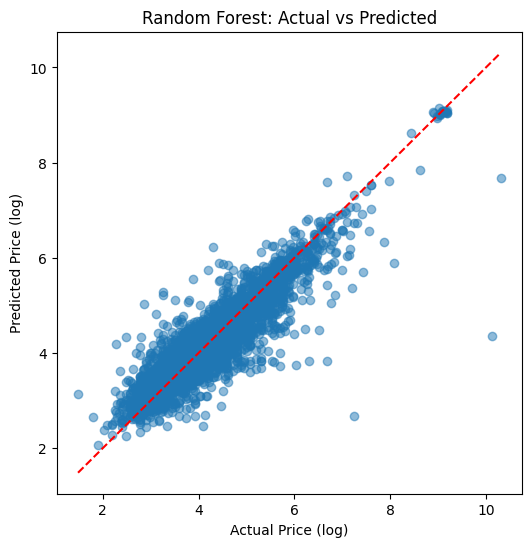

In [43]:
#visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual Price (log)")
plt.ylabel("Predicted Price (log)")
plt.title("Random Forest: Actual vs Predicted")
plt.show()
